[next up](#here)

# Data Model Usage
Load and look at various data objects.

### Table of Contents <a id=toc>
* [Imports and setup](#init)
* [Create Net](#createnet)
* [CM from Net](#cm)
* [Create TransProb](#createtp) (TPM)
* [Create States](#createstates) Methods for maniulating states. Does not contain all states.

## Imports and setup <a id=init>

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
from collections import Counter
import functools, operator
import networkx as nx

import pyphi.data_models as dm  # Prototype code

In [2]:
N = 19 # number of Nodes in system
D = 3  # Degree; average number of connections from a node to downstream nodes
S = 2 # number of States per node

p = D/N

print(f'''
{N}\t# number of Nodes
{D}\t# maximum number of Connections from a node
{S}\t# number of States per node
{p:.2f}\t# probability of edge creation for each node pairing
''')
# {labels} # node labelsb


19	# number of Nodes
3	# maximum number of Connections from a node
2	# number of States per node
0.16	# probability of edge creation for each node pairing



## Create Net <a id=createnet>

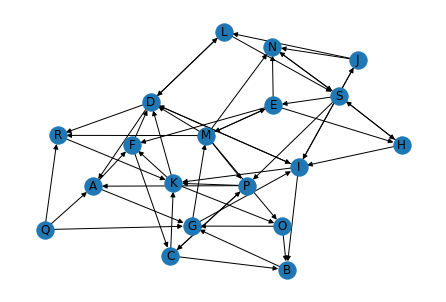

In [3]:

G = nx.gnp_random_graph(N, p, directed=True) # num_nodes, prob_edge
edges = list(G.edges())
net = dm.Net(edges=edges, SpN=S)

#Image(filename='net.png', width=500)
#nx.draw(net.graph, with_labels=True, label='gnp_random_graph({N},{p})')
net.draw()

In [4]:
print(nx.info(net.graph))
print(f'Some of the edges: {list(net.graph.edges())[:5]}...{list(net.graph.edges())[-5:]}')

Name: None
Type: DiGraph
Number of nodes: 19
Number of edges: 52
Average in degree:   2.7368
Average out degree:   2.7368
Some of the edges: [('A', 'F'), ('A', 'G'), ('B', 'G'), ('C', 'B'), ('C', 'K')]...[('R', 'K'), ('S', 'E'), ('S', 'H'), ('S', 'N'), ('S', 'P')]


In [5]:
print(f'In nodes: {list(net.graph.predecessors("A"))}')
print(f'Out nodes: {list(net.graph.successors("A"))}')

In nodes: ['D', 'P', 'Q']
Out nodes: ['F', 'G']


## CM from Net <a id=cm>

In [6]:
print(f'Node list = {net.node_labels}')

Node list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']


#### Numpy array

In [7]:
net.cm

array([[0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.

#### Pandas DataFrame

In [8]:
net.df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S
A,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
D,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
E,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
F,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
I,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Pandas DataFrame of edges

In [9]:
nx.to_pandas_edgelist(net.graph)

,source,target
0,A,F
1,A,G
2,B,G
3,C,B
4,C,K
5,C,P
6,D,A
7,D,I
8,D,L
9,D,R


## Create TransProb (TPM) - non square<a id=createtp>

In [10]:
# Make TPM for 3 inputs, 1 ouput
probs = np.array([[0.68893508, 0.40176953],
                      [0.44095309, 0.84035902],
                      [0.09975545, 0.58225631],
                      [0.86475645, 0.18650795],
                      [0.50721989, 0.86299773],
                      [0.62045787, 0.90525779],
                      [0.88270204, 0.46225991],
                      [0.51548114, 0.89159624]])
tp = dm.TransProb(list('ABC'),list('D'),probs)
tp.df

,0,1
000,0.688935,0.401770
001,0.440953,0.840359
010,0.099755,0.582256
011,0.864756,0.186508
100,0.507220,0.862998
101,0.620458,0.905258
110,0.882702,0.462260
111,0.515481,0.891596


## Create States (and probe them) <a id=createstates>


In [11]:
states = dm.States(net)
states

#### Generate a random state
Knows about nodes so makes it the right length. Uses up to 16 states per node. Always hex digit regardless of states per node.

In [12]:
state0 = states.gen_random_state()
print(f'State as hexstr = {state0}')

State as hexstr = 0100011010100110010


Compare tuple format to hex string.

In [13]:
print(f'State as tuple = {states.state_str2tuple(state0)}')

State as tuple = (0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0)


In [14]:
print(f'{state0} \t#state0')
print(f'{states.flip_char(state0,"A", must_change=True)} \t# flip A node')
print(f'{states.flip_char(state0,"C", must_change=True)} \t# flip C node')
print(f'{states.flip_chars(state0,list("ABCD"))} \t# POTENTIALLY flip nodes A-D ')

0100011010100110010 	#state0
1100011010100110010 	# flip A node
0110011010100110010 	# flip C node
0001011010100110010 	# POTENTIALLY flip nodes A-D 


In [15]:
print(f"Tuple for state of node A = {states.node_state('A', state0)}")

Tuple for state of node A = 0


# Here!!!  <a id=here>

## Local transitions
Transition from t-1 to t focused on a single node

In [16]:
stp=dm.Stp(net)

In [17]:
list(stp.tps(list('AB')))

NameError: name 'Counter' is not defined

In [ ]:
list(net.graph.predecessors('A'))

In [ ]:
net.get_node('M').states